## Question 3
### Neighbourhood Trends & Patterns

In [1]:
%matplotlib inline

In [123]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Read in csv file and inspect dataframe
file = pd.read_csv('../resources/mci_no_duplicates_2014_and_over.csv')
mci_2014_onwards = pd.DataFrame(file)
mci_2014_onwards.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,2,GO-20141260701,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3.0,...,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70)
1,3,GO-20141260889,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74)
2,4,GO-20141260973,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA
3,5,GO-20141261050,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66)
4,6,GO-20141259344,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2.0,...,Bar / Restaurant,Commercial,1420,110,Assault Bodily Harm,Assault,164,Wellington Place,77,Waterfront Communities-The Island (77)


In [4]:
#Check data types
mci_2014_onwards.dtypes

_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

In [5]:
#Convert OCC_YEAR column from float to int then check dtypes again
mci_2014_onwards['OCC_YEAR'] = mci_2014_onwards['OCC_YEAR'].astype('int64')
mci_2014_onwards.dtypes


_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR               int64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

In [6]:
#Check for any null values
mci_2014_onwards.count()
#REPORT_HOUR and OCC_HOUR have some missing data, however those columns are not relevant for the analysis in this question and will be removed from the dataframe

_id                  298472
EVENT_UNIQUE_ID      298472
REPORT_DATE          298472
OCC_DATE             298472
REPORT_YEAR          298472
REPORT_MONTH         298472
REPORT_DAY           298472
REPORT_DOY           298472
REPORT_DOW           298472
REPORT_HOUR          288353
OCC_YEAR             298472
OCC_MONTH            298472
OCC_DAY              298472
OCC_DOY              298472
OCC_DOW              298472
OCC_HOUR             278293
DIVISION             298472
LOCATION_TYPE        298472
PREMISES_TYPE        298472
UCR_CODE             298472
UCR_EXT              298472
OFFENCE              298472
MCI_CATEGORY         298472
HOOD_158             298472
NEIGHBOURHOOD_158    298472
HOOD_140             298472
NEIGHBOURHOOD_140    298472
dtype: int64

In [7]:
#Keep only necessary columns and inspect dataframe again
mci_2014_onwards = mci_2014_onwards[['EVENT_UNIQUE_ID', 'REPORT_YEAR', 'REPORT_MONTH', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'LOCATION_TYPE', 
                                     'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
mci_2014_onwards.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,2014-01-01,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,70,South Riverdale
1,GO-20141260889,2014,January,2014-01-01,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,74,North St.James Town
2,GO-20141260973,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,NSA,NSA
3,GO-20141261050,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,69,Blake-Jones
4,GO-20141259344,2014,January,2014-01-01,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,164,Wellington Place


In [85]:
#Get total count of offences per neighbourhood for all years then sort in descending order
hood_total_offences = mci_2014_onwards.groupby('NEIGHBOURHOOD_158', as_index = False).size().rename(columns = {'size': 'Total Offences'}).sort_values(by = 'Total Offences', ascending = False)
hood_total_offences

,NEIGHBOURHOOD_158,Total Offences
140,West Humber-Clairville,8053
93,Moss Park,7320
36,Downtown Yonge East,6263
153,Yonge-Bay Corridor,5840
157,York University Heights,5746
...,...,...
156,Yonge-St.Clair,615
87,Maple Leaf,573
151,Woodbine-Lumsden,559
56,Guildwood,535


In [36]:
#Get a random sample of 3 neighbourhoods to compare with top 3 and bottom 3
#DON'T RUN THIS CELL AGAIN OR IT WILL CHANGE THE 3 RANDOM NEIGHBOURHOODS
random_3_hoods = hood_total_offences.sample(n = 3)

,NEIGHBOURHOOD_158,Total Offences
39,East L'Amoreaux,1251
106,Oakridge,2277
72,Keelesdale-Eglinton West,1157


In [9]:
#Get top 3 neighbourhoods with highest number of offences
top_3_hoods = hood_total_offences.head(3)
#Get bottom 3 neighbourhoods with highest number of offences
bottom_3_hoods = hood_total_offences.tail(3)

In [41]:
#Inspect random_3_hoods
random_3_hoods

,NEIGHBOURHOOD_158,Total Offences
39,East L'Amoreaux,1251
106,Oakridge,2277
72,Keelesdale-Eglinton West,1157


In [131]:
#Inspect bottom_3_hoods
bottom_3_hoods

,NEIGHBOURHOOD_158,Total Offences
151,Woodbine-Lumsden,559
56,Guildwood,535
78,Lambton Baby Point,478


In [166]:
#Inspect top_3_hoods
top_3_hoods

,NEIGHBOURHOOD_158,Total Offences
140,West Humber-Clairville,8053
93,Moss Park,7320
36,Downtown Yonge East,6263


## Top 3 Neighbourhoods
### Neighbourhood 1: West Humber-Clairville

In [18]:
#Create new dataframe from mci_2014_onwards for West Humber-Clairville only
whc_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Humber-Clairville']
whc_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
368,GO-20141297201,2014,January,2014-01-03,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E,Break and Enter,1,West Humber-Clairville
467,GO-20141302953,2014,January,2014-01-08,2014,January,"Construction Site (Warehouse, Trailer, Shed)",Commercial,Theft Over,Theft Over,1,West Humber-Clairville
468,GO-20141304312,2014,January,2014-01-08,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,1,West Humber-Clairville
538,GO-20141303907,2014,January,2014-01-06,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,Theft Over,Theft Over,1,West Humber-Clairville
602,GO-20141319046,2014,January,2014-01-10,2014,January,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,1,West Humber-Clairville


In [19]:
#Rename location types for readability; to be used in functions later 
renamed_locations = {'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Other Commercial Places',
                    'Construction Site (Warehouse, Trailer, Shed)': 'Construction Site', 
                    'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House',
                    'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots',
                    'Retirement Home': 'Retirement Home', 'Apartment (Rooming House, Condo)': 'Apartment',
                    'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways',
                    'Bar / Restaurant': 'Bar/Restaurant', 'Ttc Bus Stop / Shelter / Loop': 'Public Transit',
                    'Schools During Supervised Activity': 'Schools, Supervised',
                    'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities',
                    'Open Areas (Lakes, Parks, Rivers)': 'Open Areas', 'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership',
                    'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit',
                    'Jails / Detention Centres': 'Jails/Detention Centres',
                    "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)": 'Other Non Commercial Places',
                    'Go Train': 'Public Transit', 'Private Property Structure (Pool, Shed, Detached Garage)': 'Private Property Structure',
                    'Religious Facilities (Synagogue, Church, Convent, Mosque)': 'Religious Facilities',
                    'Police / Courts (Parole Board, Probation Office)': 'Police/Courts', 'Convenience Stores': 'Convenience Stores',
                    'Gas Station (Self, Full, Attached Convenience)': 'Gas Stations', 'Go Station': 'Public Transit',
                    'Group Homes (Non-Profit, Halfway House, Social Agency)': 'Group Homes', 'Schools During Un-Supervised Activity': 'Schools, Unsupervised',
                    'Ttc Bus': 'Public Transit', 'Cargo Train': 'Cargo Train', 'Bank And Other Financial Institutions (Money Mart, Tsx)': 'Financial Institutions',
                    'Universities / Colleges': 'Secondary Education', 'Go Bus': 'Public Transit', 'Other Regional Transit System Vehicle': 'Public Transit',
                    'Nursing Home': 'Nursing Home', 'Community Group Home': 'Group Homes', 'Pharmacy': 'Pharmacy', 'Homeless Shelter / Mission': 'Homeless Shelters'}

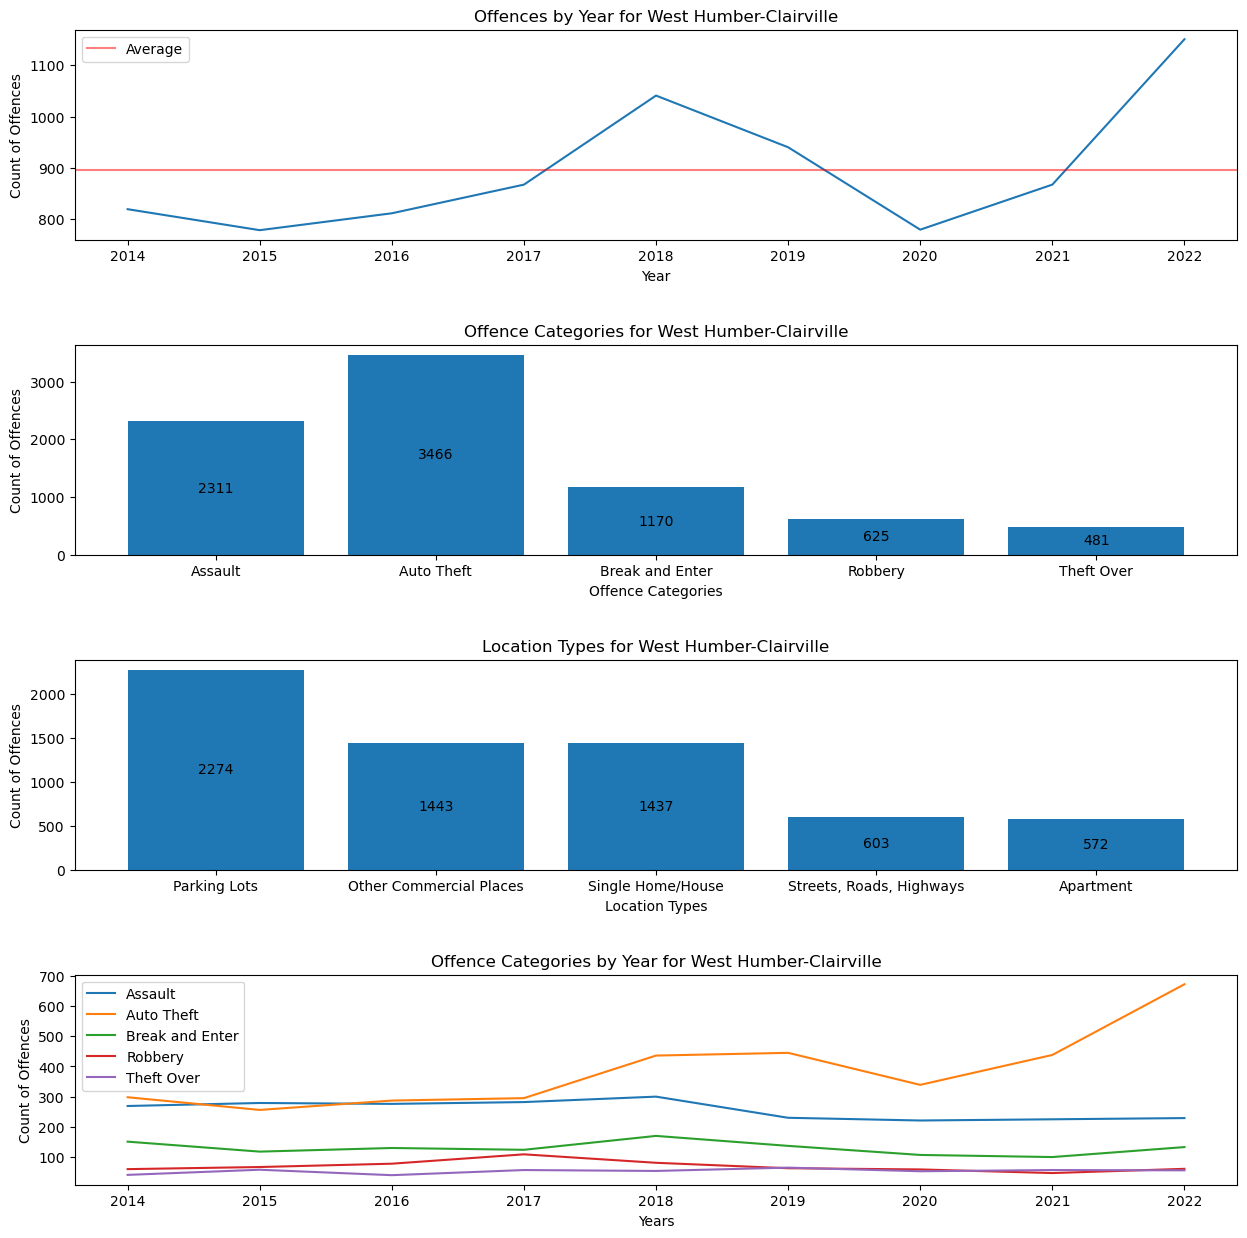

In [106]:
#Define function to generate plot of MCI categories by year for each neighbourhood
def hood_plots(df, hood):
    #Set figure with 3 rows and 1 column to have 4 different plots
    fig, ax = plt.subplots(nrows = 4, ncols = 1)
    #Set figure size using rcParams (https://saturncloud.io/blog/understanding-and-troubleshooting-figsize-in-matplotlib/)
    plt.rcParams['figure.figsize'] = (15, 15)
    
    #First dataframe: offences by year
    #Group by year and get count of offences 
    hood_year = df.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year = ax[0].plot(hood_year['OCC_YEAR'], hood_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[0].axhline(y = hood_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[0].set_title(f'Offences by Year for {hood}')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Count of Offences')
    ax[0].legend(loc = 'best')

    #Second dataframe: offence categories
    #Group by MCI category and get the count of offences
    hood_category = df.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
    #Create second plot ax[1], set title and axis labels and set bar labels to show counts on the plot
    category = ax[1].bar(hood_category.index, hood_category.values)
    ax[1].set_title(f'Offence Categories for {hood}')
    ax[1].set_xlabel('Offence Categories')
    ax[1].set_ylabel('Count of Offences')
    ax[1].bar_label(category, label_type = 'center')

    #Third dataframe: location types
    #Group by location type and get the count of offences
    hood_location = df.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename location types to be more readable and sort by descending values
    hood_location = hood_location.rename(renamed_locations).sort_values(ascending = False)
    #Get only the top 5 location types
    hood_location = hood_location.head(5)
    #Create third plot ax[2], set title and axis labels and set bar labels to show counts on the plot
    locations = ax[2].bar(hood_location.index, hood_location.values)
    ax[2].set_title(f'Location Types for {hood}')
    ax[2].set_xlabel('Location Types')
    ax[2].set_ylabel('Count of Offences')
    ax[2].bar_label(locations, label_type = 'center')

    #Fourth dataframe/plot: trend line of mci categories by year 
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood_assault = df.loc[df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_auto_theft = df.loc[df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_break_enter = df.loc[df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_robbery = df.loc[df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_theft_over = df.loc[df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[3].plot(hood_assault.index, hood_assault.values, label = 'Assault')
    ax[3].plot(hood_auto_theft.index, hood_auto_theft.values, label = 'Auto Theft')
    ax[3].plot(hood_break_enter.index, hood_break_enter.values, label = 'Break and Enter')
    ax[3].plot(hood_robbery.index, hood_robbery.values, label = 'Robbery')
    ax[3].plot(hood_theft_over.index, hood_theft_over.values, label = 'Theft Over')
    #Set title, axis labels and legend
    ax[3].set_title(f'Offence Categories by Year for {hood}')
    ax[3].set_xlabel('Years')
    ax[3].set_ylabel('Count of Offences')
    ax[3].legend(loc = 'best')

    #Adjust space between subplots for readability
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig(f'../output/{hood}_plots.png')
    plt.show()

#Call function for West Humber-Clairville
hood_plots(whc_hood, 'West Humber-Clairville')

### Neighbourhood 2: Moss Park

In [107]:
#Create new dataframe from mci_2014_onwards for Moss Park only
mp_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Moss Park']
mp_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
96,GO-20141266298,2014,January,2014-01-02,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,73,Moss Park
148,GO-20141273315,2014,January,2014-01-03,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Assault,Assault,73,Moss Park
243,GO-20141284027,2014,January,2014-01-05,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,73,Moss Park
249,GO-20141284542,2014,January,2014-01-05,2014,January,Bar / Restaurant,Commercial,B&E,Break and Enter,73,Moss Park
311,GO-20145,2014,January,2014-01-01,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park


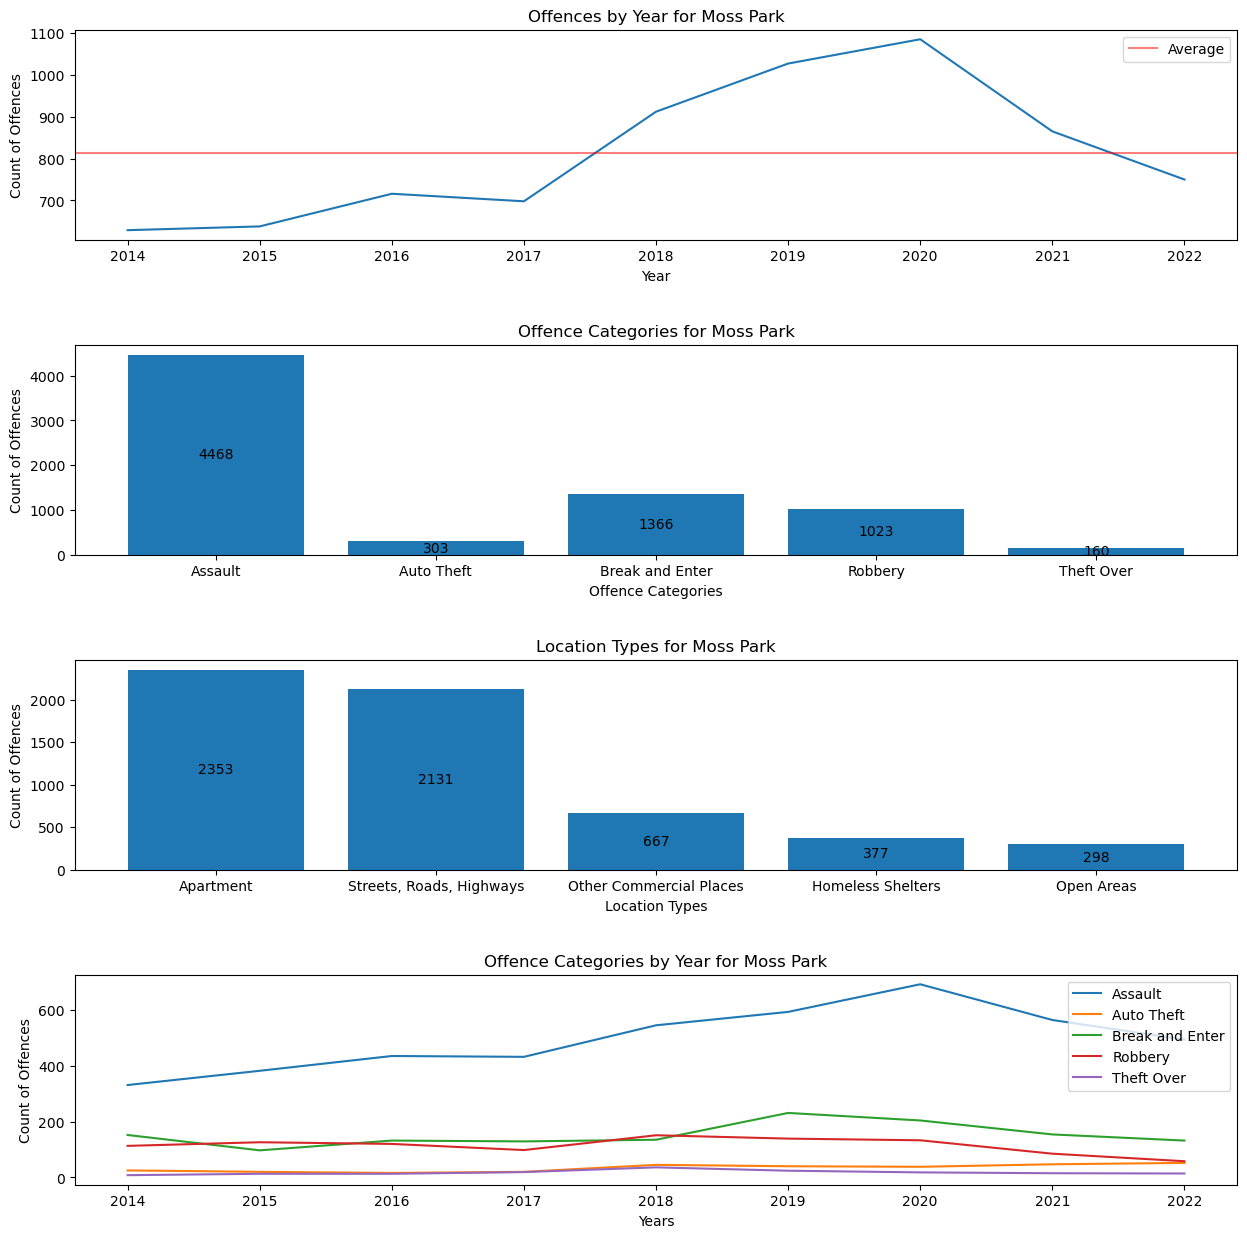

In [108]:
#Call hood_plots function for Moss Park
hood_plots(mp_hood, 'Moss Park')

### Neighbourhood 3: Downtown Yonge East

In [109]:
#Create new dataframe from mci_2014_onwards for Downtown Yonge East only
dye_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Downtown Yonge East']
dye_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
84,GO-20141270446,2014,January,2014-01-02,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,168,Downtown Yonge East
215,GO-20141278444,2014,January,2014-01-04,2014,January,Bar / Restaurant,Commercial,B&E,Break and Enter,168,Downtown Yonge East
224,GO-20141278997,2014,January,2014-01-03,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E,Break and Enter,168,Downtown Yonge East
225,GO-20141278917,2014,January,2014-01-03,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E,Break and Enter,168,Downtown Yonge East
253,GO-20141286401,2014,January,2014-01-05,2014,January,Ttc Subway Station,Transit,Assault Peace Officer,Assault,168,Downtown Yonge East


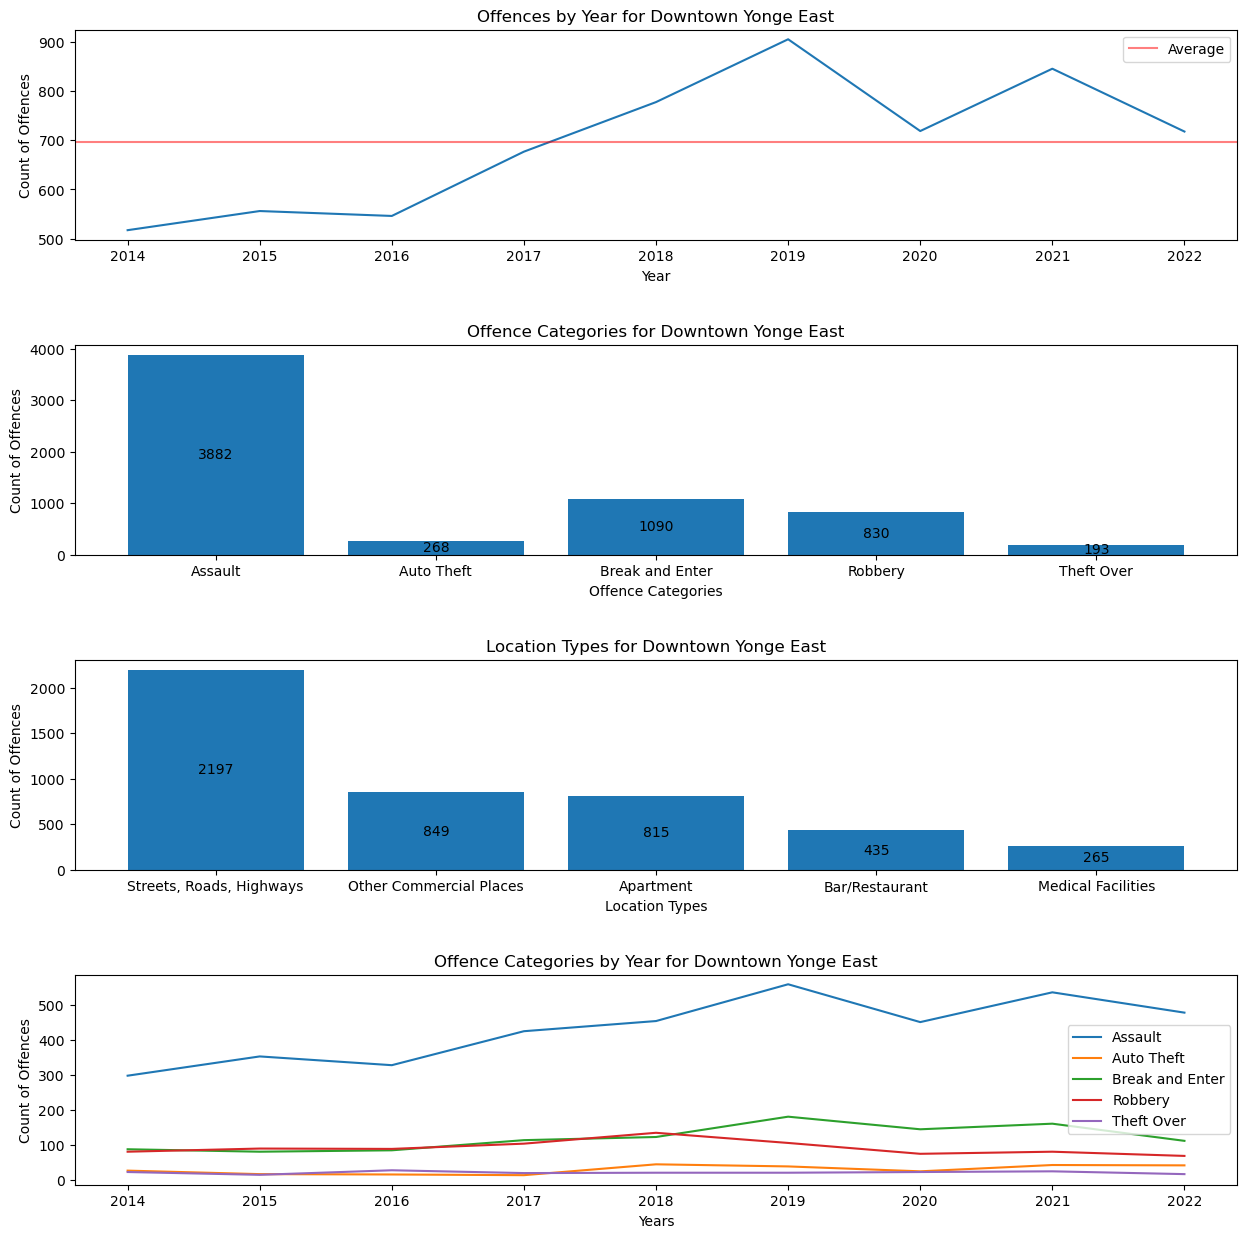

In [110]:
#Call hood_plots function for Downtown Yonge East
hood_plots(dye_hood, 'Downtown Yonge East')

## Bottom 3 Neighbourhoods
### Neighbourhood 1: Woodbine-Lumsden

In [111]:
#Create new dataframe from mci_2014_onwards for Woodbine-Lumsden only
wl_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden']
wl_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
95,GO-20141266240,2014,January,2014-01-02,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,60,Woodbine-Lumsden
369,GO-20141297455,2014,January,2014-01-03,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,60,Woodbine-Lumsden
523,GO-20141308717,2014,January,2014-01-08,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,60,Woodbine-Lumsden
1119,GO-20141359797,2014,January,2014-01-17,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,60,Woodbine-Lumsden
1482,GO-20141392589,2014,January,2014-01-21,2014,January,"Apartment (Rooming House, Condo)",Apartment,B&E,Break and Enter,60,Woodbine-Lumsden


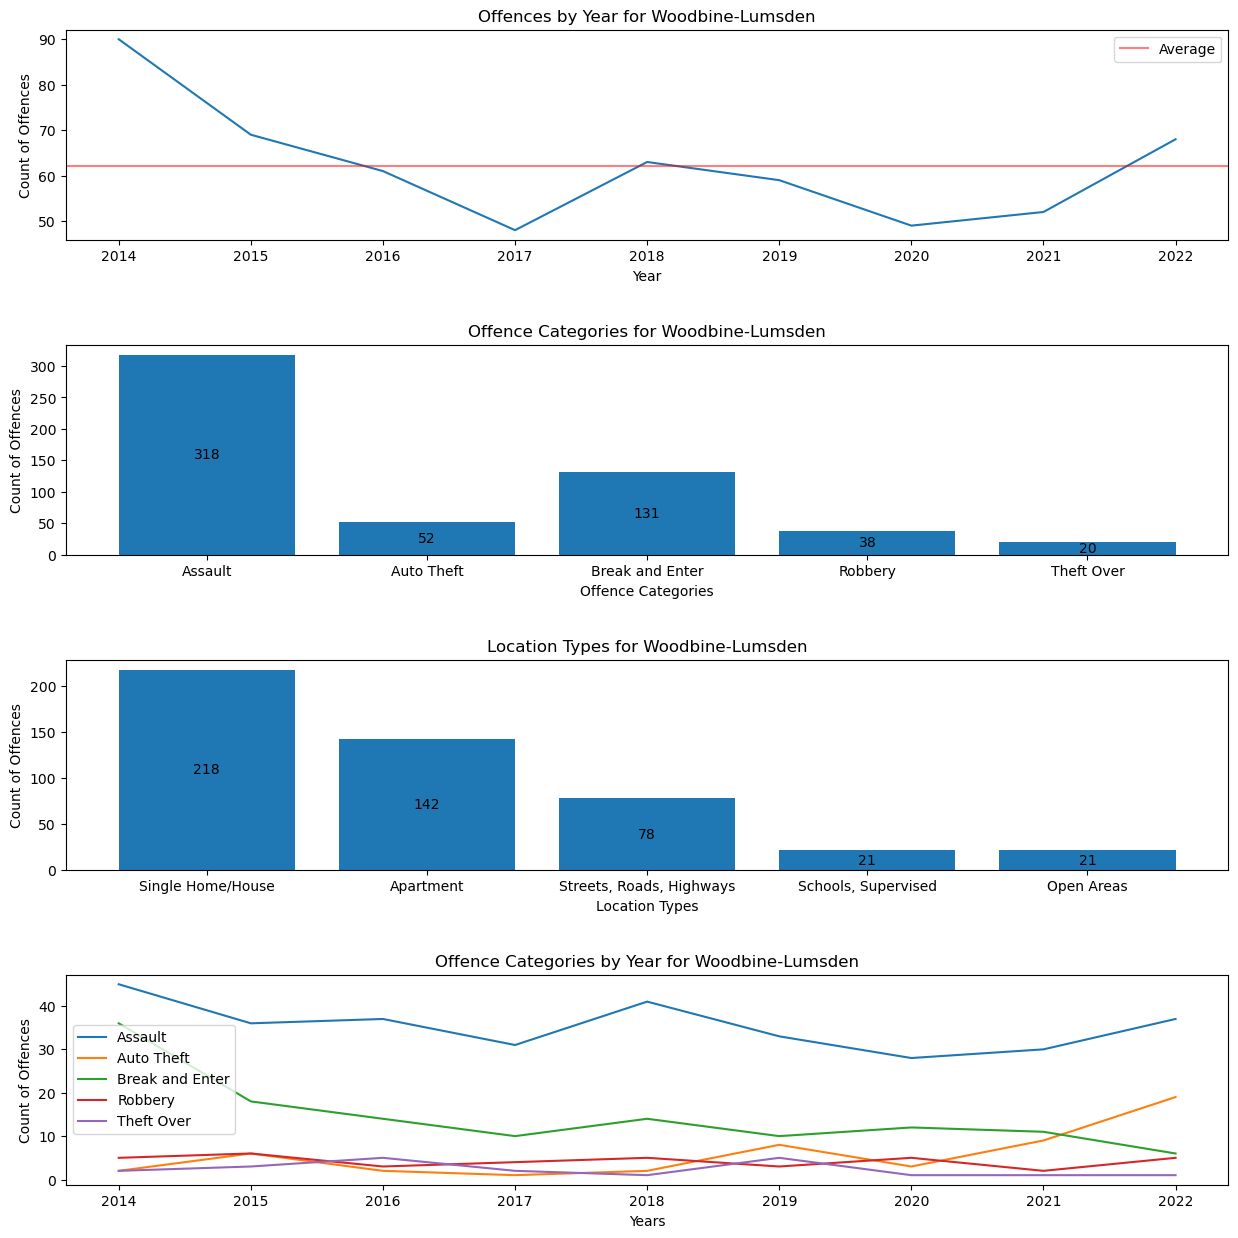

In [112]:
#Call hood_plots function for Woodbine-Lumsden
hood_plots(wl_hood, 'Woodbine-Lumsden')

### Neighbourhood 2: Guildwood

In [113]:
#Create new dataframe from mci_2014_onwards for Guildwood only
gw_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Guildwood']
gw_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
420,GO-20141301035,2014,January,2014-01-07,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E W'Intent,Break and Enter,140,Guildwood
423,GO-20141300141,2014,January,2014-01-07,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Mugging,Robbery,140,Guildwood
649,GO-20141320499,2014,January,2014-01-10,2014,January,"Apartment (Rooming House, Condo)",Apartment,Aggravated Assault,Assault,140,Guildwood
1183,GO-20141369385,2014,January,2014-01-18,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,140,Guildwood
1213,GO-20141365008,2014,January,2014-01-18,2014,January,Bar / Restaurant,Commercial,Assault,Assault,140,Guildwood


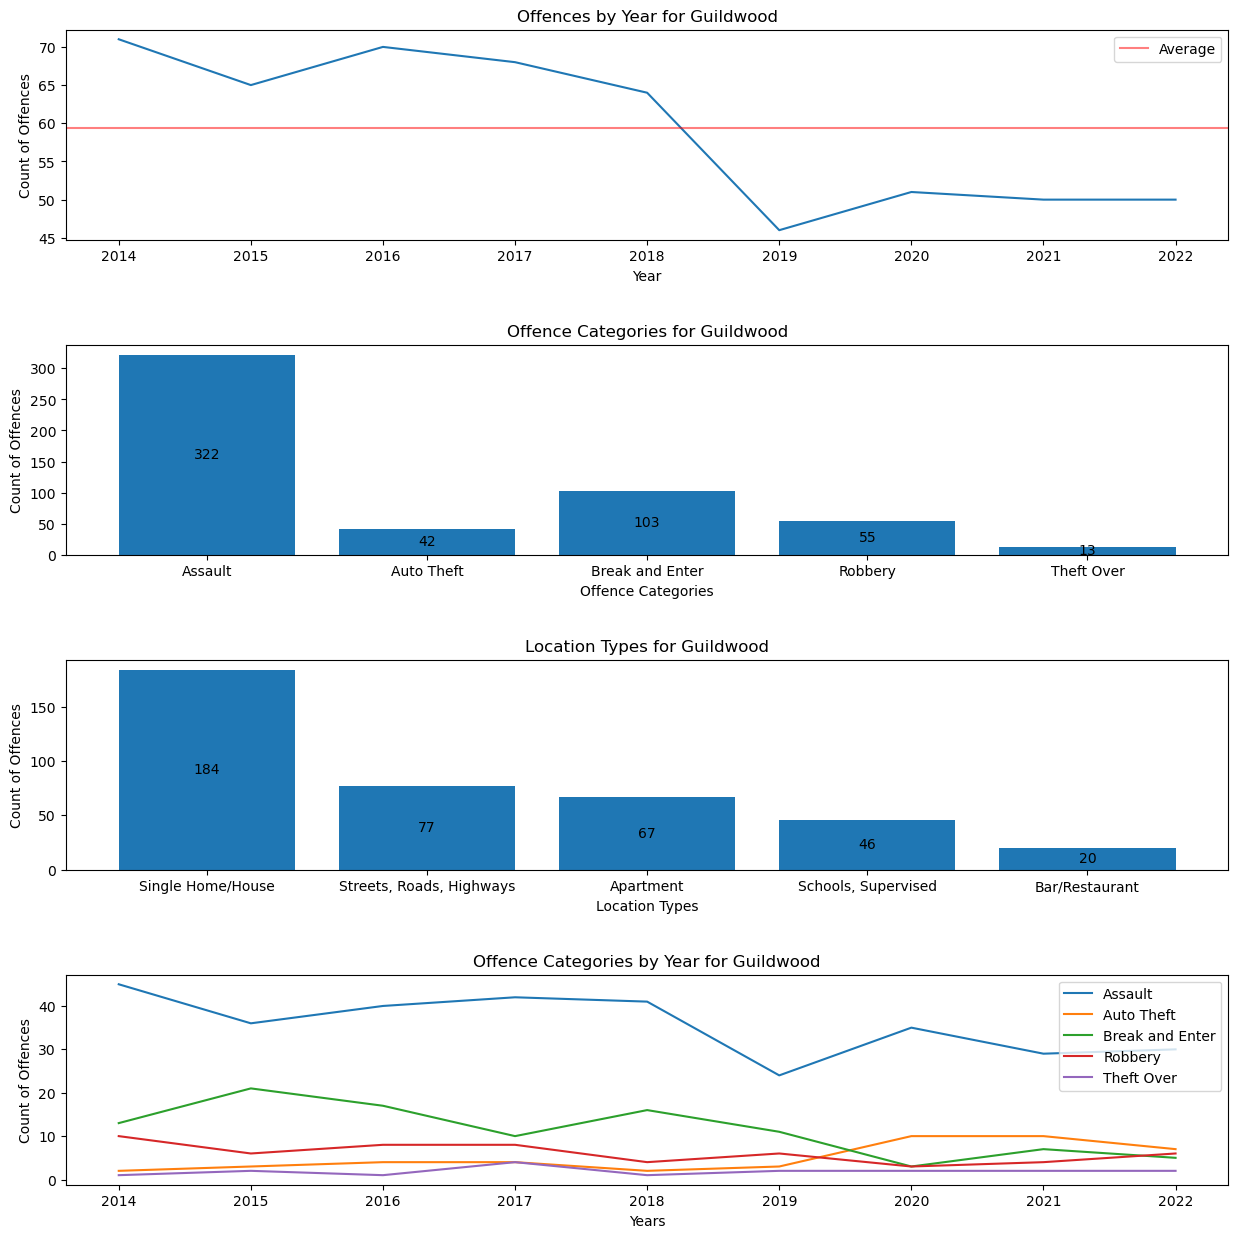

In [114]:
#Call hood_plots function for Guildwood
hood_plots(gw_hood, 'Guildwood')

### Neighbourhood 3: Lambton Baby Point

In [115]:
#Create new dataframe from mci_2014_onwards for Lambton Baby Point only
lbp_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Lambton Baby Point']
lbp_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
333,GO-20141293915,2014,January,2014-01-06,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,114,Lambton Baby Point
1154,GO-20141359879,2014,January,2014-01-17,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft Of Motor Vehicle,Auto Theft,114,Lambton Baby Point
2466,GO-20141475714,2014,February,2014-02-05,2014,February,"Open Areas (Lakes, Parks, Rivers)",Outside,Assault Peace Officer Wpn/Cbh,Assault,114,Lambton Baby Point
2470,GO-20141475714,2014,February,2014-02-05,2014,February,"Open Areas (Lakes, Parks, Rivers)",Outside,Assault Peace Officer,Assault,114,Lambton Baby Point
2526,GO-20141482466,2014,February,2014-02-06,2014,February,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,114,Lambton Baby Point


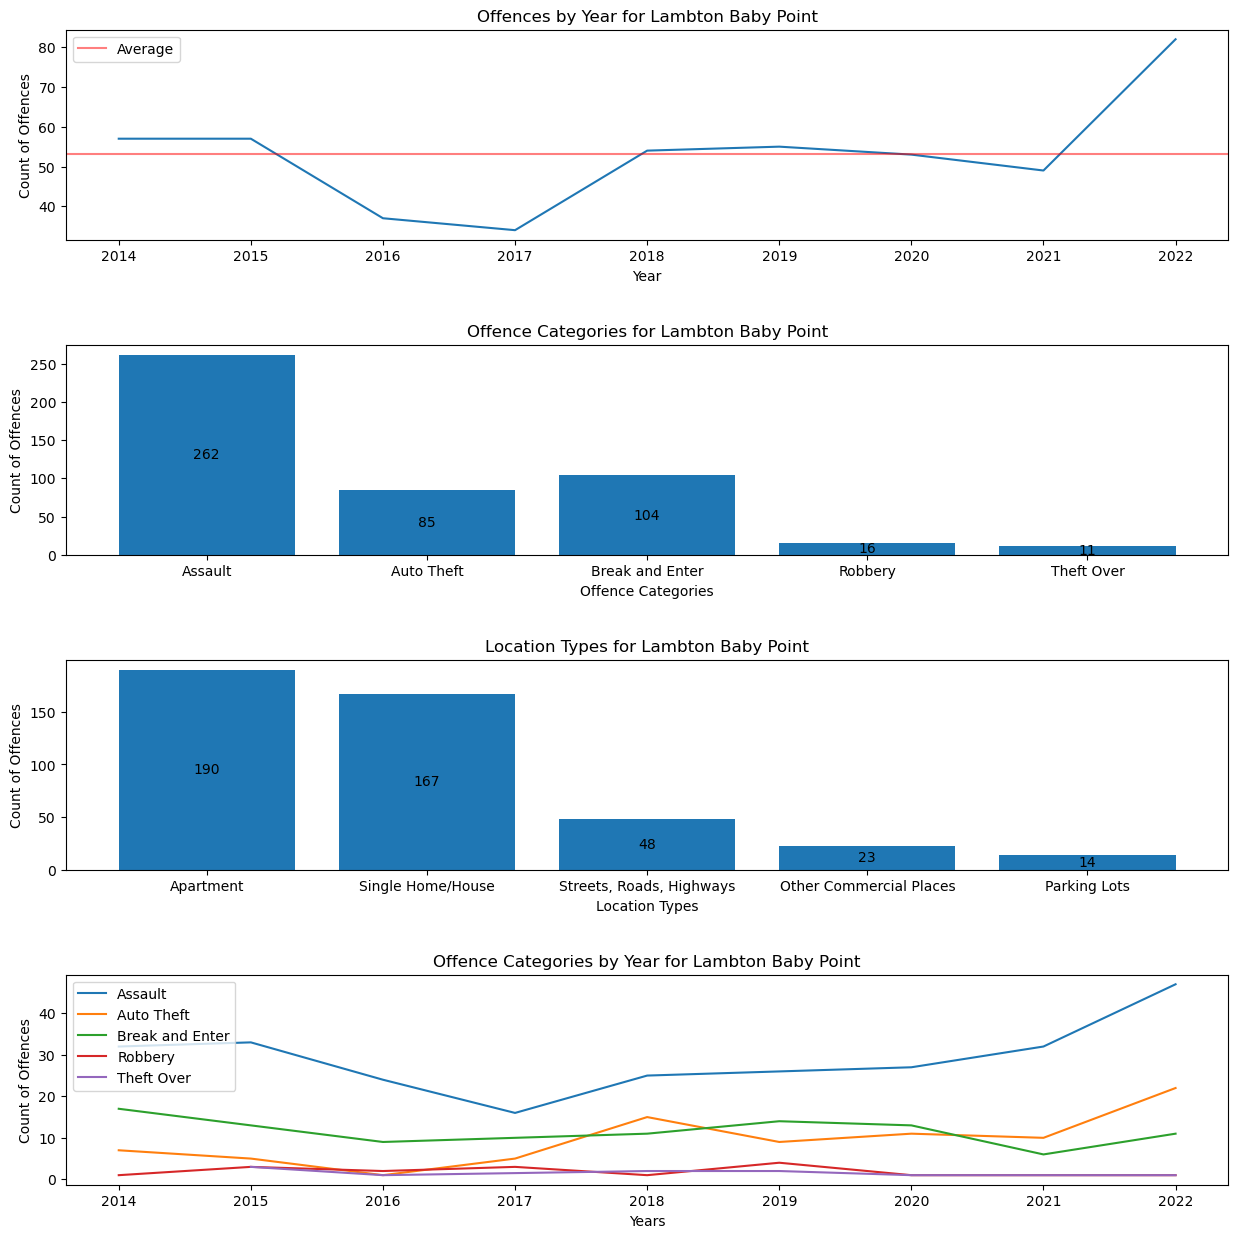

In [116]:
#Call hood_plots function
hood_plots(lbp_hood, 'Lambton Baby Point')

## 3 Random Neighbourhoods
### Neighbourhood 1: East L'Amoreaux

In [117]:
#Create new dataframe from mci_2014_onwards for East L'Amoreaux only
ela_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == "East L'Amoreaux"]
ela_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
45,GO-20141263609,2014,January,2014-01-01,2014,January,"Gas Station (Self, Full, Attached Convenience)",Commercial,Assault,Assault,148,East L'Amoreaux
165,GO-20141276157,2014,January,2014-01-03,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,148,East L'Amoreaux
169,GO-20141275653,2014,January,2014-01-03,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,148,East L'Amoreaux
443,GO-20141307180,2014,January,2014-01-08,2014,January,Convenience Stores,Commercial,Robbery - Business,Robbery,148,East L'Amoreaux
656,GO-20141322862,2014,January,2014-01-11,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,148,East L'Amoreaux


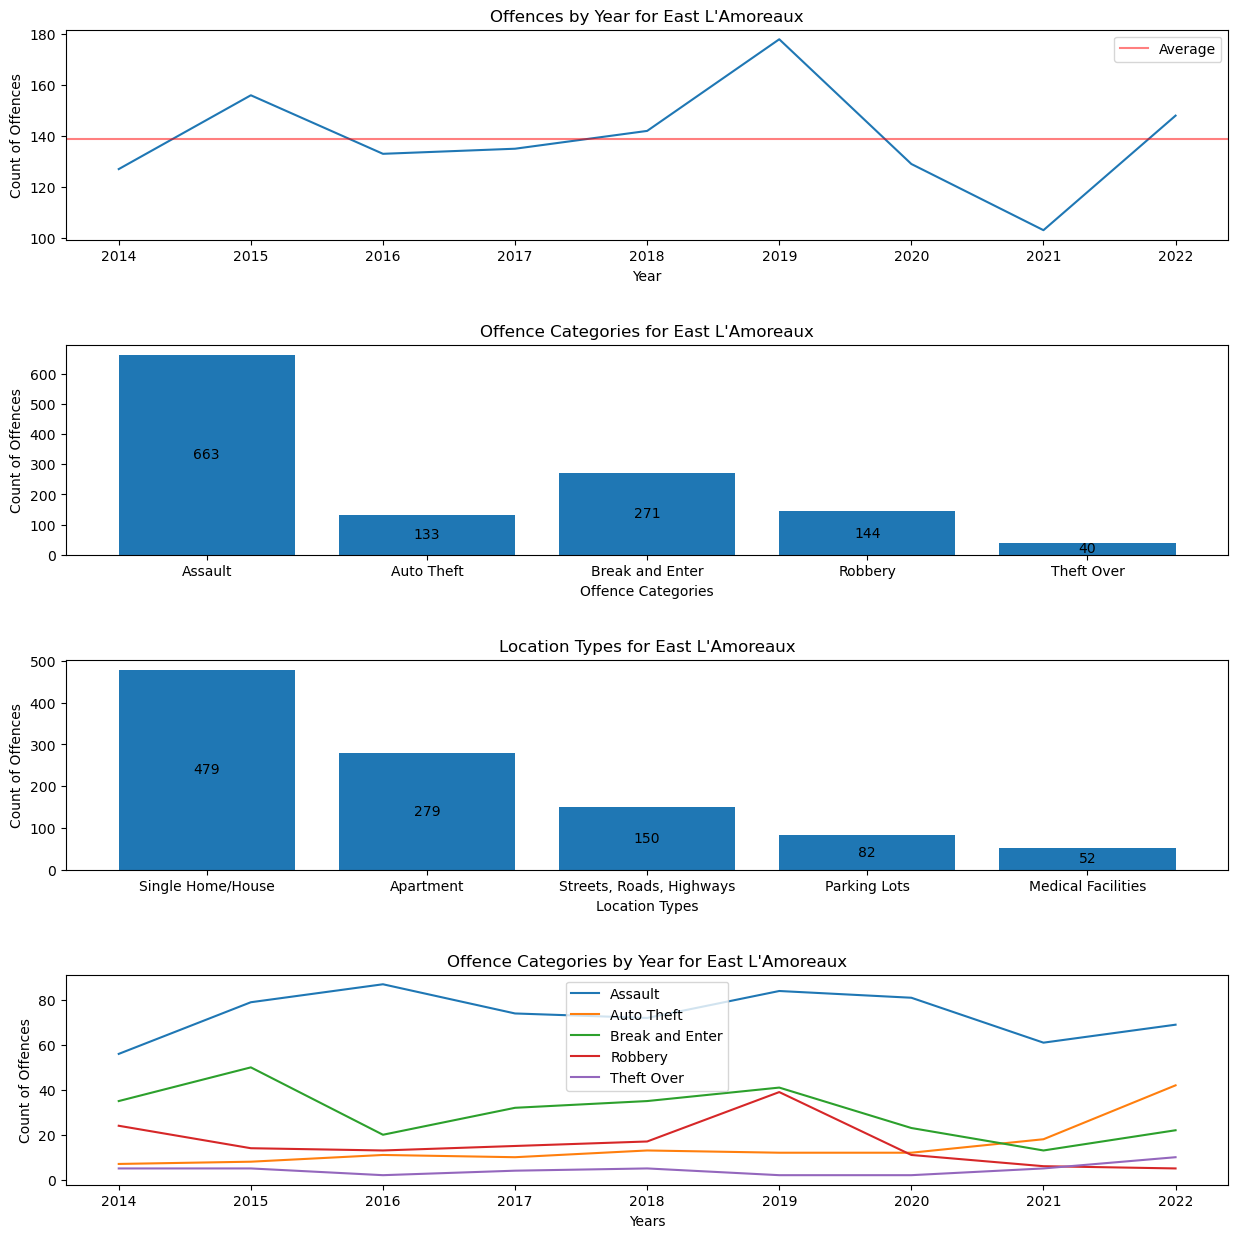

In [118]:
#Call hood_plots function
hood_plots(ela_hood, "East L'Amoreaux")

### Neighbourhood 2: Oakridge

In [119]:
#Create new dataframe from mci_2014_onwards for Oakridge only
or_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Oakridge']
or_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
302,GO-20141284247,2014,January,2014-01-05,2014,January,Unknown,Other,Assault With Weapon,Assault,121,Oakridge
377,GO-20141295113,2014,January,2014-01-06,2014,January,"Apartment (Rooming House, Condo)",Apartment,B&E,Break and Enter,121,Oakridge
753,GO-20141327757,2014,January,2014-01-12,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,121,Oakridge
769,GO-20141331434,2014,January,2014-01-11,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,121,Oakridge
822,GO-20141336718,2014,January,2014-01-13,2014,January,"Apartment (Rooming House, Condo)",Apartment,Theft Of Motor Vehicle,Auto Theft,121,Oakridge


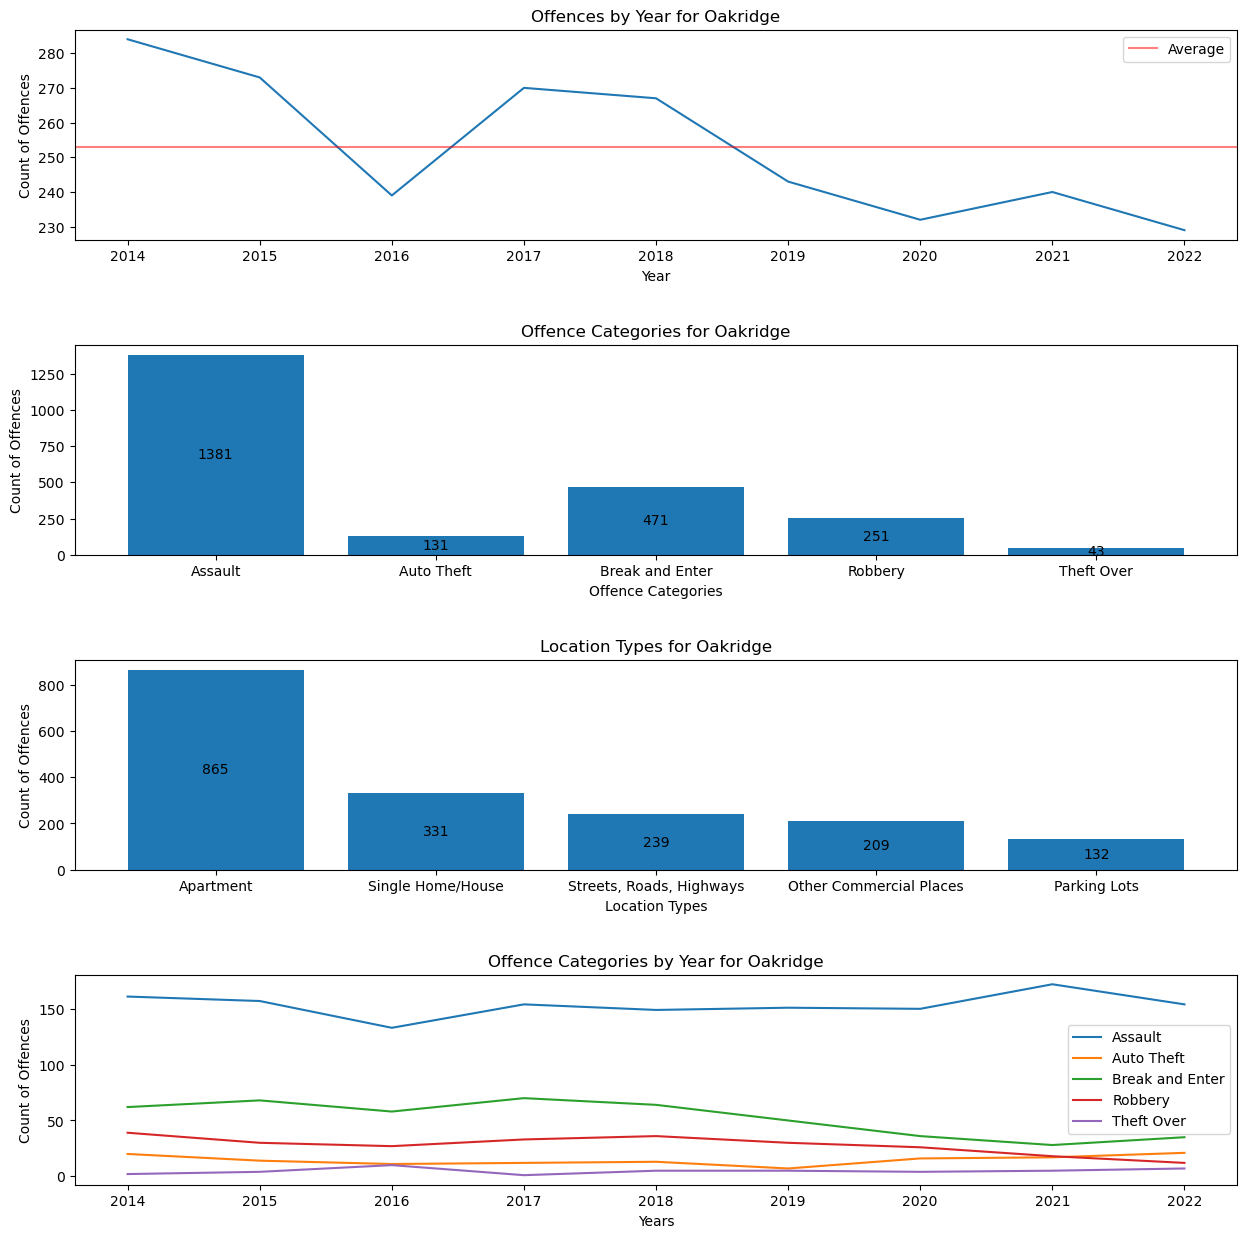

In [120]:
#Call hood_plots function
hood_plots(or_hood, 'Oakridge')

### Neighbourhood 3: Keelesdale-Eglinton West

In [121]:
#Create new dataframe from mci_2014_onwards for Keelesdale-Eglinton West only
kew_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Keelesdale-Eglinton West']
kew_hood.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
362,GO-20141292218,2014,January,2014-01-06,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft Of Motor Vehicle,Auto Theft,110,Keelesdale-Eglinton West
458,GO-20141305332,2014,January,2014-01-08,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,110,Keelesdale-Eglinton West
488,GO-20141306851,2014,January,2014-01-08,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,110,Keelesdale-Eglinton West
803,GO-20141338207,2014,January,2014-01-13,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,110,Keelesdale-Eglinton West
1206,GO-20141365281,2014,January,2014-01-18,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,110,Keelesdale-Eglinton West


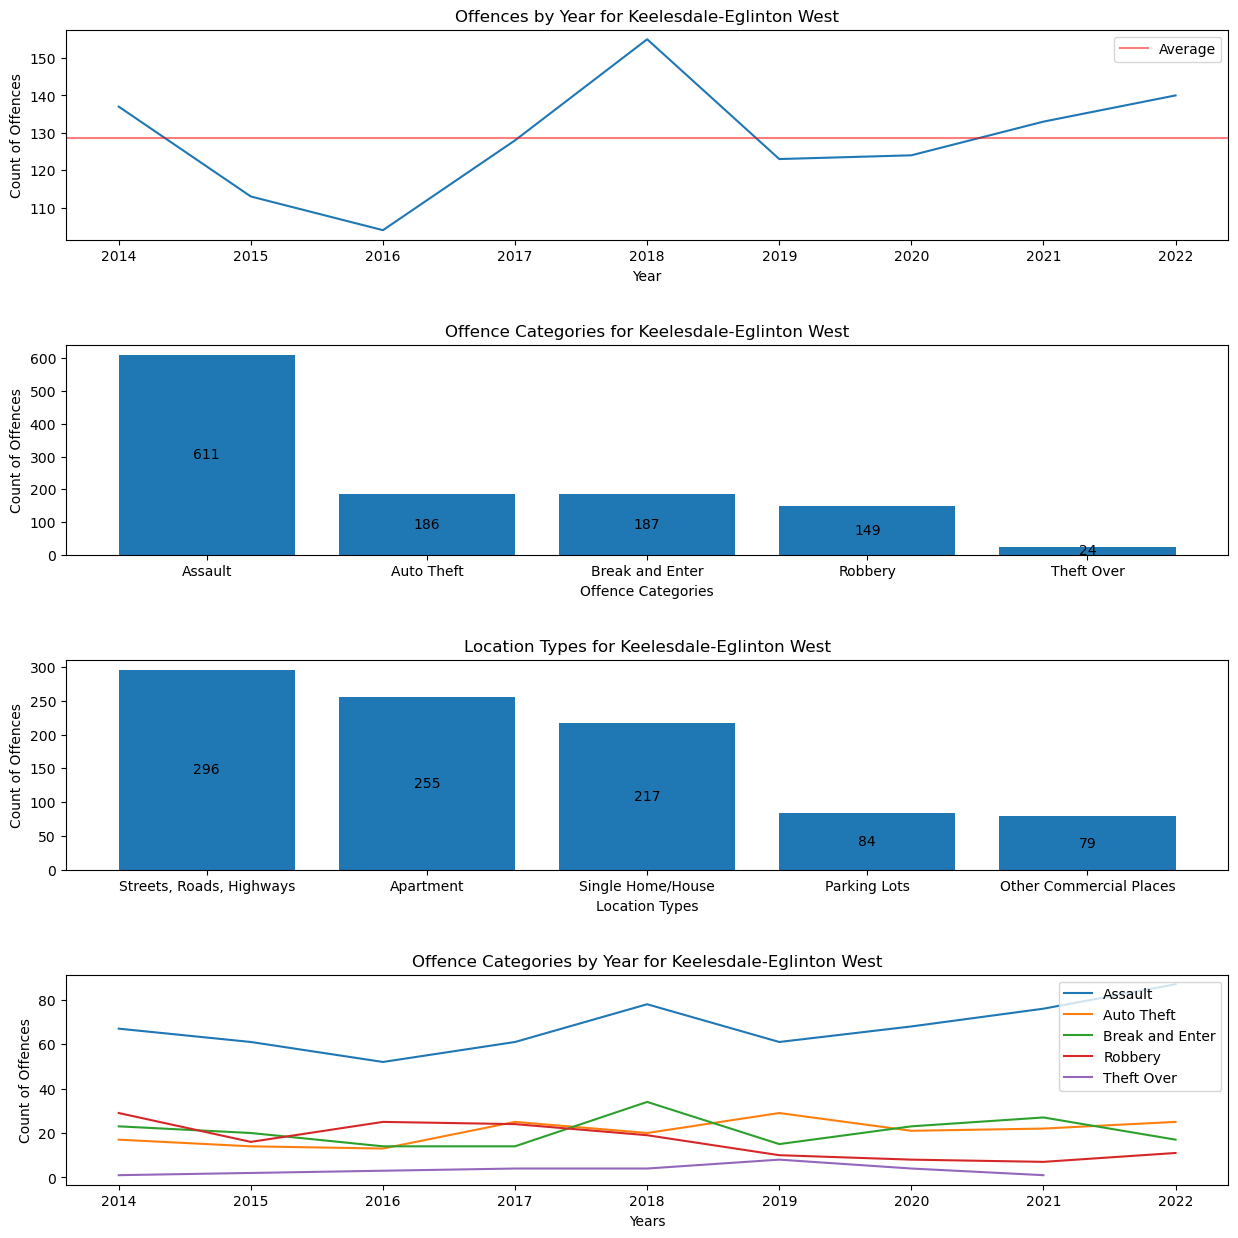

In [122]:
#Call hood_plots function
hood_plots(kew_hood, 'Keelesdale-Eglinton West')

## All Neighbourhoods
### Plot total offences by year and overall offence categories for top 3 and bottom 3 neighbourhoods on same plots

In [36]:
#Extract neighbourhood names from top_3_hoods and bottom_3_hoods and save them in a list
top3_hoods_list = list(top_3_hoods['NEIGHBOURHOOD_158'])
bottom3_hoods_list = list(bottom_3_hoods['NEIGHBOURHOOD_158'])
bottom3_hoods_list

['Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point']

In [13]:
#Reduce columns in original dataframe
reduced_mci_2014_onwards = mci_2014_onwards[['EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'LOCATION_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
reduced_mci_2014_onwards.head()

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",B&E,Break and Enter,70,South Riverdale
1,GO-20141260889,2014,January,"Apartment (Rooming House, Condo)",Assault,Assault,74,North St.James Town
2,GO-20141260973,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Theft Over,Theft Over,NSA,NSA
3,GO-20141261050,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Assault,Assault,69,Blake-Jones
4,GO-20141259344,2014,January,Bar / Restaurant,Assault Bodily Harm,Assault,164,Wellington Place


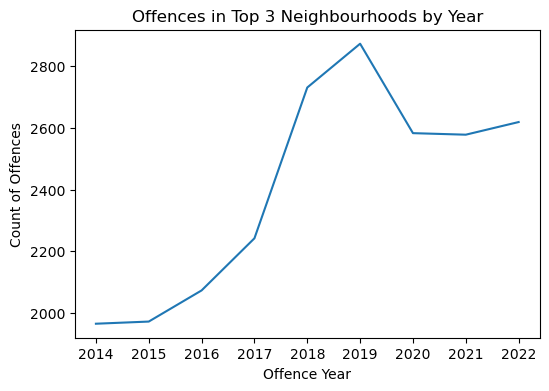

In [41]:
#Reduce to top 3 neighbourhoods
top_3_df = reduced_mci_2014_onwards.loc[(reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Humber-Clairville') | 
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Moss Park') |
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Downtown Yonge East')]
#Group by year
top_3_year = top_3_df.groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].size()
#Plot total offences by year for the top 3 neighbourhoods combined
plt.figure(figsize = (6, 4))
top_3_year.plot(kind = 'line')
plt.title('Offences in Top 3 Neighbourhoods by Year')
plt.ylabel('Count of Offences')
plt.xlabel('Offence Year')
plt.show()


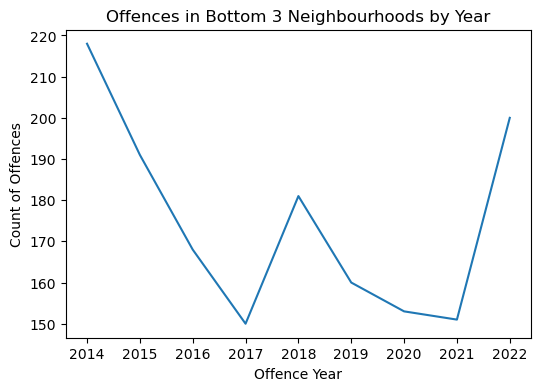

In [42]:
#Reduce to bottom 3 neighbourhoods
bottom_3_df = reduced_mci_2014_onwards.loc[(reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden') | 
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Guildwood') |
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Lambton Baby Point')]
#Group by year
bottom_3_year = bottom_3_df.groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].size()
#Plot total offences by year for the bottom 3 neighbourhoods combined
plt.figure(figsize = (6, 4))
bottom_3_year.plot(kind = 'line')
plt.title('Offences in Bottom 3 Neighbourhoods by Year')
plt.ylabel('Count of Offences')
plt.xlabel('Offence Year')
plt.show()

In [34]:
#Group neighbourhood dataframe by year and get the total count of offences
whc_by_year = whc_hood.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
mp_by_year = mp_hood.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
dye_by_year = dye_hood.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
wl_by_year = wl_hood.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
gw_by_year = gw_hood.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
lbp_by_year = lbp_hood.groupby('OCC_YEAR')['MCI_CATEGORY'].count()

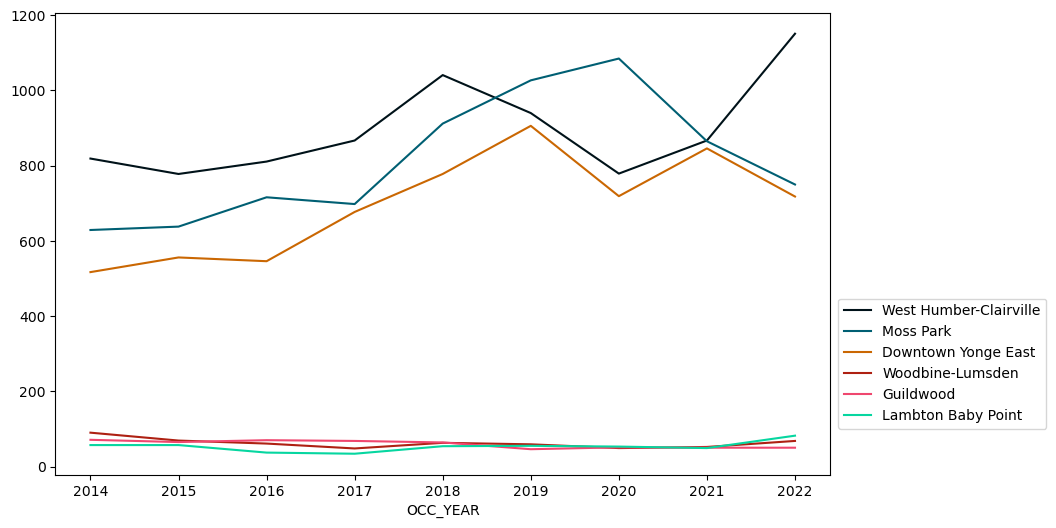

In [47]:
#Create line plot for each neighbourhood on the same figure
plt.figure(figsize = (10, 6))
whc_by_year.plot(kind = 'line', color = '#001219', label = 'West Humber-Clairville')
mp_by_year.plot(kind = 'line', color = '#005F73', label = 'Moss Park')
dye_by_year.plot(kind = 'line', color = '#CA6702', label = 'Downtown Yonge East')
wl_by_year.plot(kind = 'line', color = '#AE2012', label = 'Woodbine-Lumsden')
gw_by_year.plot(kind = 'line', color = '#EF476F', label = 'Guildwood')
lbp_by_year.plot(kind = 'line', color = '#06D6A0', label = 'Lambton Baby Point')
plt.legend(loc=(1.01, 0.1))
plt.show()

In [86]:
#Create bins in which to place values based on total offences
bins = [0, 700, 850, 1000, 1150, 1300, 1500, 1700, 1900, 2100, 2250, 2400, 2550, 2700, 2850, 3000, 4000, 8100]
labels = ['Less than 700 offences', '700 to 850 offences', '850 to 1,000 offences', '1,000 to 1,150 offences',
            '1,150 to 1,300 offences', '1,300 to 1,500 offences', '1,500 to 1,700 offences', '1,700 to 1,900 offences',
            '1,900 to 2,100 offences', '2,100 to 2,250 offences', '2,250 to 2,400 offences', '2,400 to 2,550 offences',
            '2,550 to 2,700 offences', '2,700 to 2,850 offences', '2,850 to 3,000 offences', '3,000 to 4,000 offences', 'More than 4,000 offences']



In [87]:
#Slice the data and place it into bins using pd.cut
hood_total_offences['Groups'] = pd.cut(hood_total_offences['Total Offences'], bins, labels = labels)
hood_total_offences

,NEIGHBOURHOOD_158,Total Offences,Groups
140,West Humber-Clairville,8053,"More than 4,000 offences"
93,Moss Park,7320,"More than 4,000 offences"
36,Downtown Yonge East,6263,"More than 4,000 offences"
153,Yonge-Bay Corridor,5840,"More than 4,000 offences"
157,York University Heights,5746,"More than 4,000 offences"
...,...,...,...
156,Yonge-St.Clair,615,Less than 700 offences
87,Maple Leaf,573,Less than 700 offences
151,Woodbine-Lumsden,559,Less than 700 offences
56,Guildwood,535,Less than 700 offences


In [88]:
#Group by bins to get the total per group
grouped_hood_offences = hood_total_offences.groupby('Groups')
group_counts = grouped_hood_offences['Groups'].count()
group_counts

Groups
Less than 700 offences       8
700 to 850 offences         15
850 to 1,000 offences       13
1,000 to 1,150 offences     13
1,150 to 1,300 offences     11
1,300 to 1,500 offences     19
1,500 to 1,700 offences     19
1,700 to 1,900 offences      9
1,900 to 2,100 offences      9
2,100 to 2,250 offences      2
2,250 to 2,400 offences      6
2,400 to 2,550 offences      7
2,550 to 2,700 offences      3
2,700 to 2,850 offences      3
2,850 to 3,000 offences      2
3,000 to 4,000 offences      9
More than 4,000 offences    11
Name: Groups, dtype: int64

In [164]:
#Split hood_total_offences dataframe into 3 groups using .iloc: top 53, middle 53 and bottom 53 (158 neighbourhoods total)
#Also get average offences for each group
top_53 = hood_total_offences.iloc[0:53].reset_index()
top_53 = top_53[['NEIGHBOURHOOD_158', 'Total Offences']]
top_average = round(top_53['Total Offences'].mean())

middle_53 = hood_total_offences.iloc[53:106].reset_index()
middle_53 = middle_53[['NEIGHBOURHOOD_158', 'Total Offences']]
middle_average = round(middle_53['Total Offences'].mean())

bottom_53 = hood_total_offences.iloc[106:].reset_index()
bottom_53 = bottom_53[['NEIGHBOURHOOD_158', 'Total Offences']]
bottom_average = round(bottom_53['Total Offences'].mean())


3239